# Machine Learning - Assignment1

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Question 2

### Download Data

In [18]:
file_id = '1w_4xTCDYcY-lu3p1zB3pT2EjM7CuXIaa'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)

In [19]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Feature Engineering

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [21]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [22]:
print(df.isnull().sum())

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [23]:
df.drop_duplicates(inplace=True)

#### Fix null data

<div dir="rtl">
با توجه به اطلاعاتی که از بالا در مورد دیتا بدست آوردیم، دوتا از ستون ها
بدون مقدار هستند.

چون به نسبت زیادی ستون `smoking_status`
مقدار `null` دارد،
این ستون را حذف میکنیم
</div>

In [24]:
# drop smoking_status column
df.drop('smoking_status', axis=1, inplace=True)

<div dir="rtl">
مقادیری از bmi
که null
هستند را با میانگین جایگزین میکنیم
</div>

In [25]:
df.dropna(inplace=True)

In [26]:
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64


### Classes

In [27]:
for column in df.columns:
    classes = df[column].unique()
    print(f'{column:20} | class={classes}, count={len(classes)}')

id                   | class=[30669 30468 16523 ... 28375 27973 36271], count=41938
gender               | class=['Male' 'Female' 'Other'], count=3
age                  | class=[3.00e+00 5.80e+01 8.00e+00 7.00e+01 1.40e+01 4.70e+01 5.20e+01 7.50e+01
 3.20e+01 7.40e+01 7.90e+01 3.70e+01 4.00e+01 3.50e+01 2.00e+01 4.20e+01
 4.40e+01 6.50e+01 5.70e+01 4.90e+01 7.10e+01 5.90e+01 2.50e+01 6.70e+01
 3.80e+01 5.40e+01 2.70e+01 2.30e+01 5.50e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 4.50e+01 6.60e+01 6.90e+01 5.30e+01 7.80e+01 4.30e+01
 5.10e+01 3.00e+01 4.60e+01 6.10e+01 4.80e+01 2.90e+01 1.10e+01 7.60e+01
 2.10e+01 1.80e+01 3.30e+01 8.20e+01 2.40e+01 6.40e+01 6.80e+01 6.00e+01
 3.60e+01 3.90e+01 6.40e-01 3.40e+01 7.20e+01 4.10e+01 5.60e+01 8.80e-01
 5.00e+00 8.00e+01 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.30e+01 6.20e+01
 2.00e+00 8.10e+01 9.00e+00 1.50e+01 2.80e+01 1.00e+01 7.70e+01 1.80e+00
 3.20e-01 1.08e+00 7.30e+01 5.00e+01 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2

### Feature Engineering

#### 1. One-hot encoding

In [28]:
categorical_vars = ['gender', 'work_type']

def one_hot(columns):
    for col in columns:
        for _class in df[col].unique():
            if pd.isnull([_class]):
                continue
            df[f'{col}_{_class}'] = [0] * len(df)
            df.loc[df[col] == _class, f'{col}_{_class}'] = 1

one_hot(categorical_vars)
df.drop(categorical_vars, axis=1, inplace=True)

In [29]:
df

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Female,gender_Other,work_type_children,work_type_Private,work_type_Never_worked,work_type_Self-employed,work_type_Govt_job
0,30669,3.0,0,0,No,Rural,95.12,18.0,0,1,0,0,1,0,0,0,0
1,30468,58.0,1,0,Yes,Urban,87.96,39.2,0,1,0,0,0,1,0,0,0
2,16523,8.0,0,0,No,Urban,110.89,17.6,0,0,1,0,0,1,0,0,0
3,56543,70.0,0,0,Yes,Rural,69.04,35.9,0,0,1,0,0,1,0,0,0
4,46136,14.0,0,0,No,Rural,161.28,19.1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,No,Urban,58.64,20.4,0,0,1,0,1,0,0,0,0
43396,5450,56.0,0,0,Yes,Urban,213.61,55.4,0,0,1,0,0,0,0,0,1
43397,28375,82.0,1,0,Yes,Urban,91.94,28.9,0,0,1,0,0,1,0,0,0
43398,27973,40.0,0,0,Yes,Urban,99.16,33.2,0,1,0,0,0,1,0,0,0


#### 2. Categorical to Numerical

In [31]:
# ever_married
df.loc[df['ever_married'] == 'Yes', 'ever_married'] = 1
df.loc[df['ever_married'] == 'No', 'ever_married'] = 0
# Residence_type
df.loc[df['Residence_type'] == 'Urban', 'Residence_type'] = 1
df.loc[df['Residence_type'] == 'Rural', 'Residence_type'] = 0

In [32]:
df

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Female,gender_Other,work_type_children,work_type_Private,work_type_Never_worked,work_type_Self-employed,work_type_Govt_job
0,30669,3.0,0,0,0,0,95.12,18.0,0,1,0,0,1,0,0,0,0
1,30468,58.0,1,0,1,1,87.96,39.2,0,1,0,0,0,1,0,0,0
2,16523,8.0,0,0,0,1,110.89,17.6,0,0,1,0,0,1,0,0,0
3,56543,70.0,0,0,1,0,69.04,35.9,0,0,1,0,0,1,0,0,0
4,46136,14.0,0,0,0,0,161.28,19.1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,0,1,58.64,20.4,0,0,1,0,1,0,0,0,0
43396,5450,56.0,0,0,1,1,213.61,55.4,0,0,1,0,0,0,0,0,1
43397,28375,82.0,1,0,1,1,91.94,28.9,0,0,1,0,0,1,0,0,0
43398,27973,40.0,0,0,1,1,99.16,33.2,0,1,0,0,0,1,0,0,0


#### 3. Remove Outliers

In [33]:
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

# Capping (Winsorizing) Outliers
def cap_outliers(column):
    upper_limit = df[column].quantile(0.99)
    lower_limit = df[column].quantile(0.01)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])

# Apply capping to outliers for each numerical feature
for col in numeric_columns:
    cap_outliers(col)

In [34]:
df

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Female,gender_Other,work_type_children,work_type_Private,work_type_Never_worked,work_type_Self-employed,work_type_Govt_job
0,30669,3.0,0,0,0,0,95.12,18.0,0,1,0,0,1,0,0,0,0
1,30468,58.0,1,0,1,1,87.96,39.2,0,1,0,0,0,1,0,0,0
2,16523,8.0,0,0,0,1,110.89,17.6,0,0,1,0,0,1,0,0,0
3,56543,70.0,0,0,1,0,69.04,35.9,0,0,1,0,0,1,0,0,0
4,46136,14.0,0,0,0,0,161.28,19.1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,0,1,58.64,20.4,0,0,1,0,1,0,0,0,0
43396,5450,56.0,0,0,1,1,213.61,51.8,0,0,1,0,0,0,0,0,1
43397,28375,81.0,1,0,1,1,91.94,28.9,0,0,1,0,0,1,0,0,0
43398,27973,40.0,0,0,1,1,99.16,33.2,0,1,0,0,0,1,0,0,0


#### 4. Normalization

In [36]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [37]:
df

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Female,gender_Other,work_type_children,work_type_Private,work_type_Never_worked,work_type_Self-employed,work_type_Govt_job
0,30669,-1.728940,0,0,0,0,-0.200967,-1.402059,0,1,0,0,1,0,0,0,0
1,30468,0.719834,1,0,1,1,-0.372040,1.412954,0,1,0,0,0,1,0,0,0
2,16523,-1.506324,0,0,0,1,0.175824,-1.455173,0,0,1,0,0,1,0,0,0
3,56543,1.254112,0,0,1,0,-0.824093,0.974768,0,0,1,0,0,1,0,0,0
4,46136,-1.239185,0,0,0,0,1.379787,-1.255997,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,-1.417278,0,0,0,1,-1.072579,-1.083379,0,0,1,0,1,0,0,0,0
43396,5450,0.630788,0,0,1,1,2.630103,3.086027,0,0,1,0,0,0,0,0,1
43397,28375,1.743867,1,0,1,1,-0.276946,0.045282,0,0,1,0,0,1,0,0,0
43398,27973,-0.081583,0,0,1,1,-0.104439,0.616252,0,1,0,0,0,1,0,0,0


### Split Dataset

In [39]:
features = df.drop('stroke', axis=1)
target = df['stroke']

# Split the data into training and testing sets. 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

### Test Different Ks

In [ ]:
accuracy = []
k_values = list(range(1, 30))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

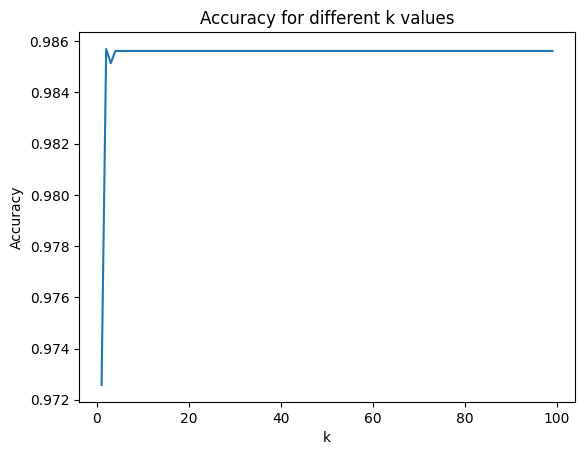

In [44]:
# plot
plt.plot(k_values, accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for different k values')
plt.show()

### Test Different Nearest Algorithms

In [45]:
algorithms = ['ball_tree', 'kd_tree', 'brute']
accuracy = []

for algo in algorithms:
    knn = KNeighborsClassifier(algorithm=algo)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

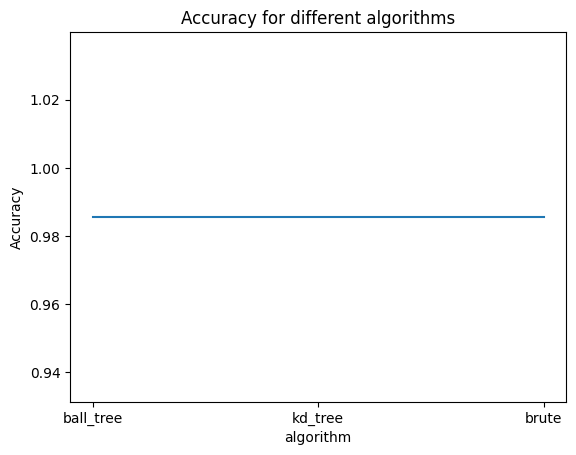

In [47]:
# plot
plt.plot(algorithms, accuracy)
plt.xlabel('algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy for different algorithms')
plt.show()